In [16]:
from voice import RawVoiceData

voice_data = RawVoiceData("test.wav")

print(f"channel: {'stereo' if voice_data.is_stereo else 'mono'}")
print(f"length: {len(voice_data)}")
print(f"sample rate: {voice_data.sample_rate}")
print(f"time: {len(voice_data) / voice_data.sample_rate}s")

raw_data = voice_data.get_voice_data()[0] # if mono sound, 0 and 1st data is same

channel: stereo
length: 809508
sample rate: 44100
time: 18.356190476190477s


c:\Users\hoodit\Desktop\HW\mfcc\voice.py:16: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, data = read(path)


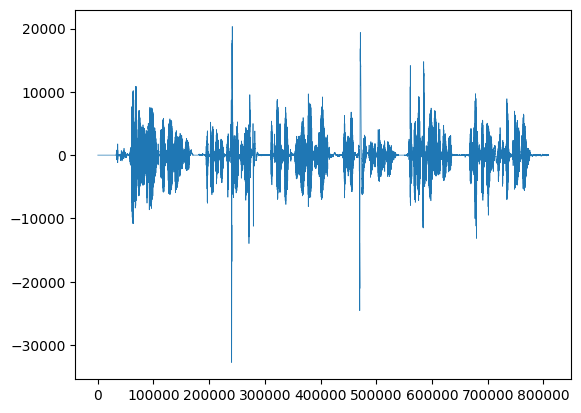

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# plot raw data
plt.plot(np.arange(len(raw_data)), raw_data.data, linewidth=0.5)
plt.show()

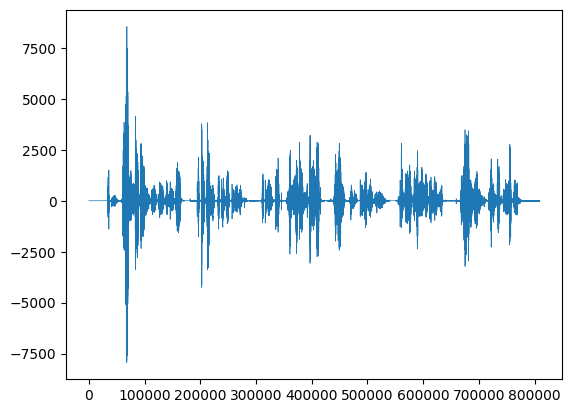

In [18]:
from pre_emphasis import pre_emphasis

# plot pre emphasis data
pre_data = pre_emphasis(raw_data.data)
plt.plot(np.arange(pre_data.shape[0]), pre_data, linewidth=0.5)
plt.show()

In [19]:
# 25ms array length
length = raw_data.sample_rate // 40
# or
# length = 4048
print(f"framing length: {length}")

framing length: 1102


In [20]:
from fourier import stft
from window import hamming

# stft, frame size = length, frame shift  frame size //2, windowing function = hamming
freq_data = stft(pre_data.flatten(), length, length//2, hamming)

windowing size: padding zero-data, shape (1013,)


<Axes: >

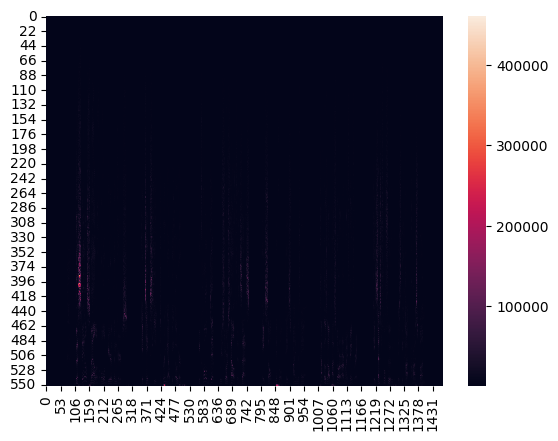

In [21]:
import seaborn as sns

# plot
sns.heatmap(np.abs(freq_data.T[::-1])) # using heatmap, reverse last axis order

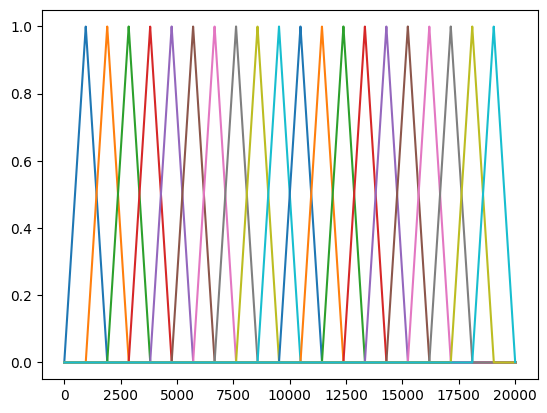

In [22]:
from filter_bank import create_mel_filter_bank, create_triangular_filter_bank

# plot triangular filter
filters = create_triangular_filter_bank(20000, 0, 20)
for fil in filters:
    plt.plot(np.arange(fil.shape[-1]), fil)
plt.show()

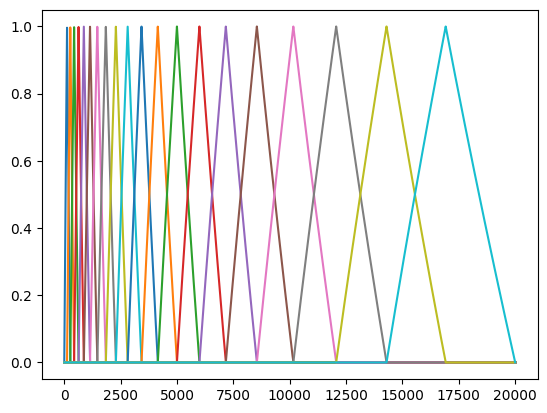

In [23]:
# plot mel filter
filters = create_mel_filter_bank(20000, 0, 20)
for fil in filters:
    plt.plot(np.arange(fil.shape[-1]), fil)
plt.show()

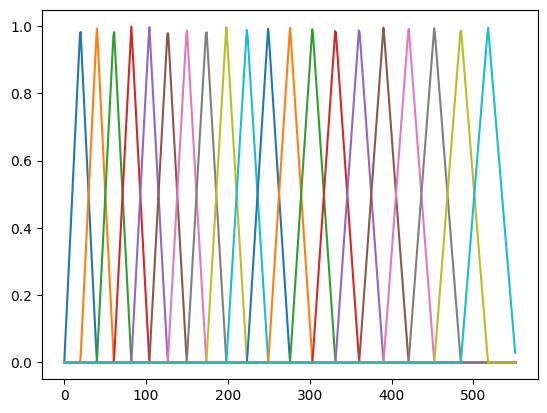

In [24]:
# create filter bank for mel
filter = create_mel_filter_bank(length//2 + 1, 0, 20)

# plot filter
for fil in filter:
    plt.plot(np.arange(fil.shape[0]), fil)
plt.show()

<Axes: >

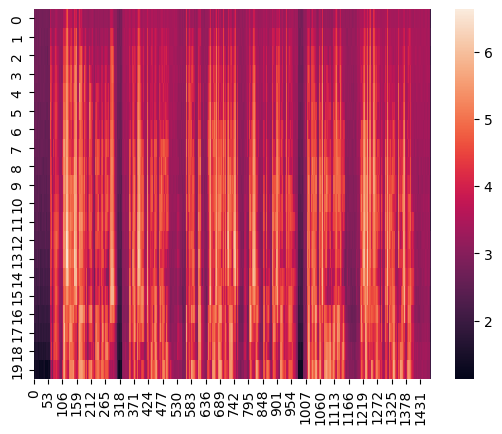

In [25]:
bmel = np.dot(filter, abs(freq_data).T)
sns.heatmap(np.log10(bmel)[::-1])

In [26]:
from scipy.fftpack import dct

# dct
mfcc = dct(np.log(bmel), type=3, axis=0, norm='ortho') # in lecture, introduce type 3 dct, so use type 3 dct
# see https://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.dct.html

<Axes: >

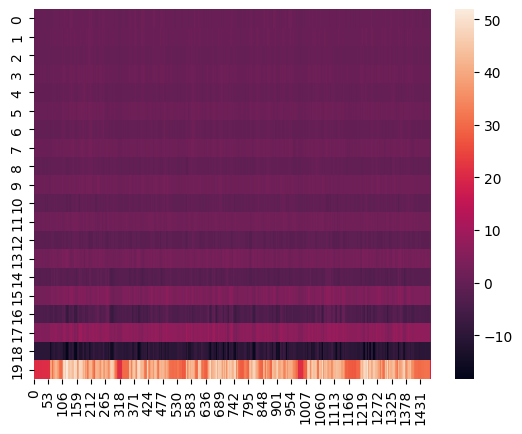

In [27]:
sns.heatmap(mfcc[::-1])

<Axes: >

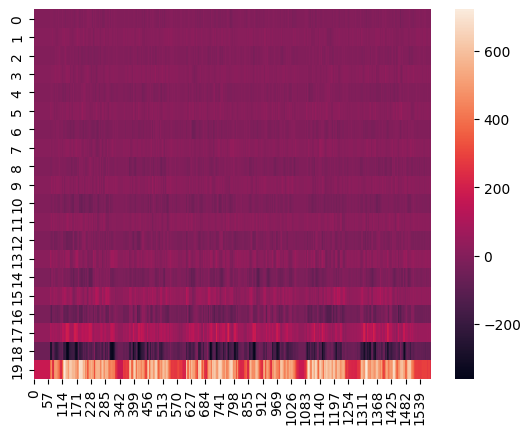

In [28]:
# compare with librosa
import librosa
librosa_mfcc = librosa.feature.mfcc(y=pre_data, sr=raw_data.sample_rate, n_mfcc=20, dct_type=3, norm='ortho')
sns.heatmap(librosa_mfcc[::-1])

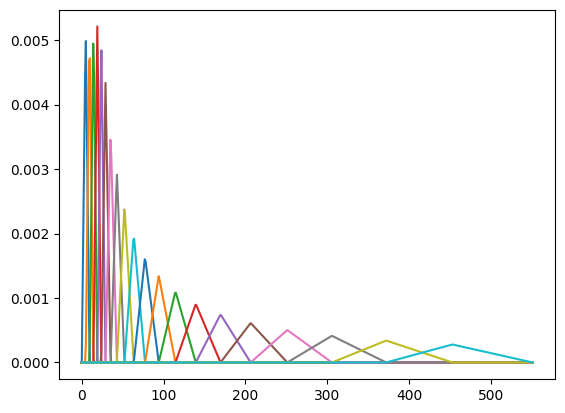

In [29]:
# why difference happens?

# librosa mel filter
librosa_mel_filter = librosa.filters.mel(sr=raw_data.sample_rate, n_fft=length, n_mels=20)
for fil in librosa_mel_filter:
    plt.plot(np.arange(fil.shape[0]), fil)
plt.show()

<Axes: >

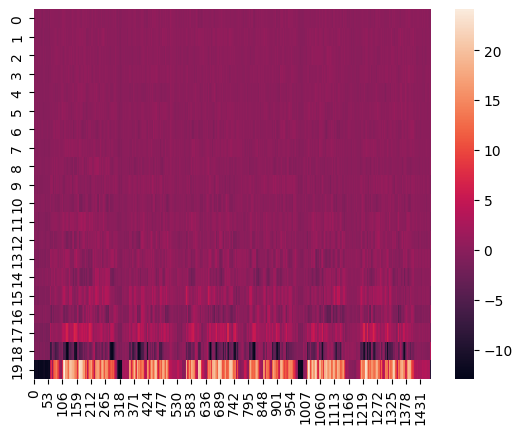

In [30]:
# then if we use this filter, it works like librosa?

new_filter = librosa_mel_filter
new_bmel = np.dot(new_filter, abs(freq_data).T)
new_mfcc = dct(np.log(new_bmel), type=3, axis=0, norm='ortho')

sns.heatmap(new_mfcc[::-1])

# it still looks different why?
# 1. librosa default values: librosa has many default values like n_fft, win_size, hop_size
# 2. librosa output scaler: librosa output use power_to_db function

windowing size: padding zero-data, shape (1013,)


<Axes: >

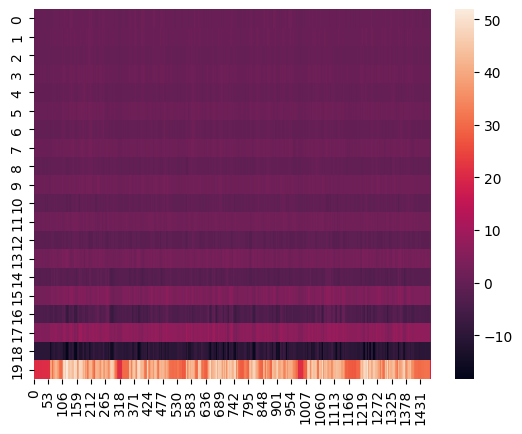

In [31]:
# final
from mfcc import mfcc

mf = mfcc(pre_data, raw_data.sample_rate)
sns.heatmap(mf[::-1])